In [20]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def load_samples(path):
    with open(path, encoding='utf-8') as f:
        for line in f:
            yield json.loads(line)


def load_passages(path):
    print('Loading passages from {}...'.format(path))

    samples = []

    for sample in load_samples(path):
        passages = []
        selected = []
        s = {}
        for passage in sample['passages']:
            passages.append(passage['passage_text'].lower())
            selected.append(passage['is_selected'])
        s['query'] = sample['query'].lower()
        s['selected'] = selected
        s['passages'] = passages
        s['answer'] = ''
        s['query_type'] = sample['query_type']
        if len(sample['answers']) > 0:
            s['answer'] = sample['answers'][0].lower()
        
        samples.append(s)

    print('Loaded {} samples.'.format(len(samples)))

    return samples

In [16]:
train = load_passages('datasets/msmarco/train_v1.1.json')

Loading passages from datasets/msmarco/train_v1.1.json...
Loaded 82326 samples.


In [17]:
df = pd.DataFrame(train)

In [18]:
df.head()

,answer,passages,query,query_type,selected
0,results-based accountability is a disciplined ...,"[since 2007, the rba's outstanding reputation ...",what is rba,description,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,yes,"[in his younger years, ronald reagan was a mem...",was ronald reagan a democrat,description,"[0, 1, 0, 0, 0, 0, 0]"
2,20-25 minutes,"[sydney, new south wales, australia is located...",how long do you need for sydney and surroundin...,numeric,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
3,$11 to $22 per square foot,"[in regards to tile installation costs, consum...",price to install tile in shower,numeric,"[0, 0, 0, 0, 0, 0, 0, 0, 1]"
4,due to symptoms in the body,"[conclusions: in adult body ct, dose to an org...",why conversion observed in body,description,"[0, 0, 1, 0, 0, 0, 0, 0]"


In [6]:
print('Average Number of Passages:', sum([len(t['passages']) for t in train]) / len(train))    

Average Number of Passages: 8.21360202123266


In [7]:
print('Average Passage Length:', sum([len(t['passages'][i]) for t in train for i in range(len(t['passages']))]) / sum([len(t['passages']) for t in train]))

Average Passage Length: 421.67736282392747


In [8]:
print('Average Number of Selected Passages per Sample:', sum([sum(t['selected']) for t in train]) / len(train))

Average Number of Selected Passages per Sample: 1.0752739110366105


In [9]:
print('Average Query Length:', sum([len(t['query']) for t in train]) / len(train))  

Average Query Length: 33.9625756140223


In [43]:
print('Number of Yes/No Answers:', sum([1 for t in train if t['answer'] == 'yes' or t['answer'] == 'no']))
print('Percentage of Yes/No Answers:', sum([1 for t in train if t['answer'] == 'yes' or t['answer'] == 'no']) / len(train))
print('First Words of Yes/No Queries:', set([t['query'][:t['query'].index(' ')] for t in train if t['answer'] == 'yes' or t['answer'] == 'no']))

Number of Yes/No Answers: 5872
Percentage of Yes/No Answers: 0.07132619099676894
First Words of Yes/No Queries: {'combustion', 'originally', 'circulatory', 'disease', 'best', 'as', 'did', 'species', 'price', 'seinfeld', 'construction', 'dose', 'nasonex', 'why', 'bad', 'lantana', 'i', 'cholesterol', 'common', 'female', 'cellular', 'retinal', 'usda', 'laura', 'eczema', 'good', 'pulmonary', 'eye', 'thyroid', 'calcium', '14th', 'vitamins', 'railroads', 'michael', 'lichen', 'google', 'pay', 'lg', 'anaerobic', 'argentina', 'will', 'dissolved', 'lowest', 'fresno', 'cholera', 'malaria', 'making', 'gastritis', 'blood', 'were', 'how', 'spirulina', 'first', 'found', 'over', 'temperature', 'when', 'alan', 'antidiuretic', 'can', 'age', 'would', 'foods', 'ebay', 'any', 'webmd', 'what', 'oral', 'here', 'contract', 'mark', 'powershell', 'pink', 'is', 'has', 'urinary', 'bipolar', 'mail', 'balanced', 'sedimentary', 'greek', 'polio', 'hives', 'human', 'florida', 'allah', 'marfan', 'chipotle', 'prunes', '

In [14]:
print('Percentage of Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])]]) / len(train))

Percentage of Answers Verbatim in Selected Passage: 0.6025192527269635


In [36]:
print('Percentage of Description Answers Verbatim in Selected Passage:', sum([1 for t in train if (t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] == 'description')]) / sum([1 for t in train if t['query_type'] == 'description']))
print('Percentage of Numeric Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] == 'numeric']) / sum([1 for t in train if t['query_type'] == 'numeric']))
print('Percentage of Entity Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] == 'entity']) / sum([1 for t in train if t['query_type'] == 'entity']))
print('Percentage of Location Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] == 'location']) / sum([1 for t in train if t['query_type'] == 'location']))
print('Percentage of Person Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] == 'person']) / sum([1 for t in train if t['query_type'] == 'person']))
print('Percentage of Non-Description Answers Verbatim in Selected Passage:', sum([1 for t in train if t['answer'] in t['passages'][np.argmax(t['selected'])] and t['query_type'] != 'description']) / sum([1 for t in train if t['query_type'] != 'description']))

Percentage of Description Answers Verbatim in Selected Passage: 0.540890994417384
Percentage of Numeric Answers Verbatim in Selected Passage: 0.7016433781527375
Percentage of Entity Answers Verbatim in Selected Passage: 0.6048774768437097
Percentage of Location Answers Verbatim in Selected Passage: 0.680898321816387
Percentage of Person Answers Verbatim in Selected Passage: 0.6900296150049359
Percentage of None-Description Answers Verbatim in Selected Passage: 0.6766760337213971


## Query Types

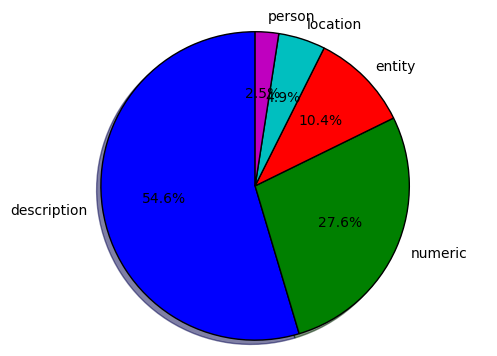

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'description', 'numeric', 'entity', 'location', 'person'
sizes = [0, 0, 0, 0, 0]
for t in train:
    sizes[labels.index(t['query_type'])] += 1
    
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()